In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
# Dimension reduction and clustering libraries
import umap

# scRNA-seq validation

This notebook performs the validation on the dataset of Omori et al (Cell Metabolism 2020;32(5):814–828.e6, https://doi.org/10.1016/j.cmet.2020.09.006 ). The file `GSE155182_NASH_7m_liver.h5ad` must be downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE155182 and placed in this folder before running the notebook.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
gene_list = ["tdTomato",
             "Cdkn2a",
             "Lncpint",
             "Luc7l3",
             "AI427809",
             "Fabp3",
             "Pcnp",
             "Cd59a",
             "Ash1l",
             "Cdhr4",
             "Micalcl",
             "Gm38050"]

In [5]:
def loading_scaled_data(path):
    # Load the H5AD file
    adata = sc.read(path)
    # Access the gene expression data
    gene_expression = adata.X #the gene expression data is already normalized here

    # Get the cell names and gene names
    cell_names = adata.obs["cell type"]#adata.obs_names
    gene_names = adata.var_names

    # Create a table using a pandas DataFrame
    df = pd.DataFrame(data=gene_expression, index=cell_names, columns=gene_names)

    # return the table
    return df

In [ ]:
adata = sc.read("GSE155182_NASH_7m_liver.h5ad")

In [7]:
len(adata.X[0])

2154

In [8]:
umap_coords = adata.obsm["X_umap"]
umap_coords

array([[  5.499436  ,   2.7960317 ],
       [  1.870096  ,   0.59552485],
       [  2.424607  ,   1.4074905 ],
       ...,
       [ -5.938601  ,   7.9577794 ],
       [-13.3423815 ,  -6.955915  ],
       [  4.767362  , -12.79413   ]], dtype=float32)

In [9]:
extracted = np.take(umap_coords, [0,2], axis = 0)
extracted

array([[5.499436 , 2.7960317],
       [2.424607 , 1.4074905]], dtype=float32)

In [10]:
dataf = pd.DataFrame({'umap1': extracted[:,0], 'umap2': extracted[:, 1]},
                      columns=['umap1', 'umap2'])
dataf

,umap1,umap2
0,5.499436,2.796032
1,2.424607,1.407490


In [11]:
"Cd59a" in adata.var_names ##gene not found..solve it later

False

In [ ]:
loading_scaled_data("GSE155182_NASH_7m_liver.h5ad")

,4732440D04Rik,Gm26901,Mybl1,Sulf1,Il17a,Gsta3,Ogfrl1,Ptp4a1,Ptpn18,Neurl3,...,Pdcd4,Adra2a,Adrb1,Ablim1,Slc18a2,Nanos1,Csf2ra,mt-Nd6,AC125149.3,tdTomato
cell type,,,,,,,,,,,,,,,,,,,,,
Endothelial cell,-0.152390,-0.225259,-0.205668,-0.205730,0.025669,-0.159242,-0.746032,-0.541303,0.867533,-0.006851,...,0.950185,-0.121780,-0.212168,-0.053268,-0.162554,-0.153333,-0.707458,-0.413435,-0.130605,0.202414
Endothelial cell,-0.166841,-0.155837,-0.189806,-0.153587,-0.033859,-0.188331,-0.436947,1.170134,0.227633,0.203003,...,0.784504,-0.089029,-0.136306,-0.194197,-0.149162,-0.105987,-0.358009,-0.521309,-0.146968,0.865949
Endothelial cell,3.475077,-0.150222,-0.176365,-0.105870,-0.049039,-0.166489,-0.391905,0.736356,-0.591317,-0.615258,...,0.429283,-0.091525,-0.094346,-0.201487,4.186132,-0.097116,-0.290647,-0.495025,-0.128648,-0.223671
Endothelial cell,-0.186795,-0.172057,-0.157934,-0.038477,-0.050283,-0.110733,-0.450513,-0.910339,-0.471732,0.943439,...,-0.620124,-0.111737,-0.049200,-0.149246,-0.141971,-0.102297,-0.325242,3.317412,-0.085663,0.861806
Endothelial cell,-0.187057,-0.126902,5.992833,-0.054411,-0.077124,6.533684,-0.272439,0.727908,-0.462077,-0.600360,...,1.101182,-0.084539,-0.040909,-0.245620,-0.137302,-0.077278,-0.142751,5.320791,-0.118816,0.873391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T cell,-0.162656,-0.183598,2.933342,-0.165743,-0.012126,-0.171861,-0.556543,-1.001198,-0.747609,0.722183,...,1.655405,-0.103155,-0.159482,3.418528,-0.153812,-0.123913,-0.489937,-0.471172,-0.136498,0.130084
Neutrophil,-0.193751,-0.220146,-0.143049,0.017973,-0.031108,-0.039095,3.748760,4.383398,3.009988,2.345464,...,-0.491839,-0.145371,-0.025515,-0.042882,-0.143743,-0.124365,-0.484100,-0.244433,-0.032528,0.018841
B cell,-0.197943,-0.127239,-0.144920,0.005109,-0.091078,-0.123993,-0.246399,-0.733329,-0.338494,-0.604814,...,2.837769,-0.091767,0.007948,-0.239290,-0.132521,-0.070581,-0.090723,-0.455312,-0.091745,-1.307362


In [13]:
def extracting_genes_from_raw_data(path, gene_list):
    adata = sc.read(path)
    genes = adata.raw.var #selecting all the 15390 gene names
    
    #assign a number to each gene to select a column
    genes['new_col'] = range(1, len(adata.raw.var) + 1)
    genes = genes.reset_index()
    
    #extracting only our 10 genes (including tdTomato, so a total of 11)
    genes.loc[genes["index"].isin(gene_list)]
    
    #extracting the indices of the selected genes
    indices = list(genes.loc[genes["index"].isin(gene_list)].index)
    
    #extracting from only the columns that correspond to our genes of interest
    np.array(adata.raw.X.todense())[:,indices] #genes are the columns
    
    # Access the gene expression data
    gene_expression = np.array(adata.raw.X.todense())[:,indices] #the gene expression data is already normalized here

    # Get the cell names and gene names
    cell_names = adata.obs["cell type"]#adata.obs_names
    gene_names = list(genes.loc[genes["index"].isin(gene_list)]["index"])
   
    # Create a table using a pandas DataFrame
    df = pd.DataFrame(data=gene_expression, index=cell_names, columns=gene_names)
    # return the table - df consisting of genes as columns and cell types as rows
    return df

In [ ]:
df_reduced = extracting_genes_from_raw_data("GSE155182_NASH_7m_liver.h5ad",gene_list)

In [ ]:
df_reduced[:40]

,Cd59a,Ash1l,AI427809,Cdkn2a,Fabp3,Lncpint,Micalcl,Cdhr4,Luc7l3,Pcnp,tdTomato
cell type,,,,,,,,,,,
Endothelial cell,1.118113,0.804441,0.0,0.0,0.0,0.344876,0.0,0.0,0.344876,0.973526,2.177531
Endothelial cell,0.726054,1.435257,0.0,0.0,0.0,0.427523,0.0,0.0,0.427523,0.427523,2.662798
Endothelial cell,0.881234,0.534702,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.881234,1.342278
Endothelial cell,0.000000,1.270571,0.0,0.0,0.0,0.000000,0.0,0.0,1.812505,0.824809,2.871233
Endothelial cell,1.570269,1.570269,0.0,0.0,0.0,0.819477,0.0,0.0,0.000000,0.819477,2.616895
...,...,...,...,...,...,...,...,...,...,...,...
T cell,1.120322,1.529360,0.0,0.0,0.0,0.935851,0.0,0.0,0.416379,0.416379,1.899277
Neutrophil,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,2.162617
B cell,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000


### Plotting tdTomato distribution to decite the threshold for tdTom+ and tdTom-

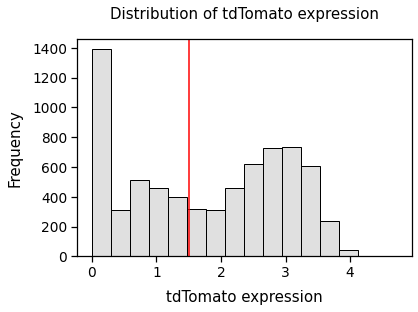

In [ ]:
with sns.plotting_context("notebook", font_scale=1.25):
    fig, ax = plt.subplots()
    sns.histplot(list(df_reduced.tdTomato), color = "lightgrey", alpha=0.7, bins = 16)
    ax.ticklabel_format(axis='x', style='scientific')
    #ax.set_xticks(np.arange(0,90))
    #ax.set_yticks(np.arange(0,200,50))
    ax.set_xlabel("tdTomato expression", labelpad=10)
    ax.set_ylabel("Frequency", labelpad=10)
    ax.set_title("Distribution of tdTomato expression", pad=20)
    plt.axvline(1.5, c= "red")
    plt.savefig("tdTomato_distribution.svg", dpi = 300, bbox_inches = 'tight',  transparent=True)

## 2 UMAP of all cell types

In [ ]:
def umap_celltypes(adata, path=None, filename=None):
    """Function that takes the annotated data from a given condition 
       and plots the UMAP of all the cell types.
    """
    umap_coordinates = adata.obsm["X_umap"]
    cell_types = adata.obs['cell type']
    sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)  # Compute neighborhood graph
    sc.tl.umap(adata)  # Compute UMAP embedding

    # Access the UMAP coordinates from the AnnData object
    umap_coordinates = adata.obsm['X_umap']

    # Access the cell type annotations from the AnnData object
    cell_types = adata.obs['cell type']

    # Plot the UMAP embedding with cell type annotations
    with sns.plotting_context("notebook", font_scale=1.25):
        #sc.pl.umap(adata, color='cell type', palette="tab10")
        if path==None and filename == None:
            sc.pl.umap(adata, color='cell type', palette="tab10", save="fig.svg")#.savefig("fig.pdf", dpi = 500, bbox_inches = 'tight',  transparent=True)
        else:
            sc.pl.umap(adata, color='cell type', palette="tab10", save = path + filename)#.savefig(path + filename, dpi = 500, bbox_inches = 'tight',  transparent=True)

In [ ]:
umap_df = pd.DataFrame({'umap1': adata.obsm["X_umap"][:,0], 'umap2': adata.obsm["X_umap"][:,1], 
                        "cell_type": list(df_reduced.index),  "Cd59a": df_reduced.Cd59a, "tdTomato": list(df_reduced.tdTomato) },
                      columns=['umap1', 'umap2', "cell_type", "Cd59a", "tdTomato"])
umap_df['tdTomato_categ'] = np.where(umap_df['tdTomato']<=1.5 , 0 , umap_df['tdTomato'])
umap_df['tdTomato_categ'] = np.where(umap_df['tdTomato']>1.5 , 1 , umap_df['tdTomato_categ'])

In [ ]:
umap_df

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Endothelial cell,5.499436,2.796032,Endothelial cell,1.118113,2.177531,1.0
Endothelial cell,1.870096,0.595525,Endothelial cell,0.726054,2.662798,1.0
Endothelial cell,2.424607,1.407490,Endothelial cell,0.881234,1.342278,0.0
Endothelial cell,1.813806,1.579184,Endothelial cell,0.000000,2.871233,1.0
Endothelial cell,1.550893,1.760944,Endothelial cell,1.570269,2.616895,1.0
...,...,...,...,...,...,...
T cell,4.856079,-11.421179,T cell,1.120322,1.899277,1.0
Neutrophil,-14.363137,-6.498253,Neutrophil,0.000000,2.162617,1.0
B cell,-5.938601,7.957779,B cell,0.000000,0.000000,0.0


In [ ]:
# Split the DataFrame based on a condition
condition = umap_df['tdTomato_categ'] == 1
umap_df_td_up = umap_df[condition]
umap_df_td_down = umap_df[~condition]

In [ ]:
umap_df_td_up

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Endothelial cell,5.499436,2.796032,Endothelial cell,1.118113,2.177531,1.0
Endothelial cell,1.870096,0.595525,Endothelial cell,0.726054,2.662798,1.0
Endothelial cell,1.813806,1.579184,Endothelial cell,0.000000,2.871233,1.0
Endothelial cell,1.550893,1.760944,Endothelial cell,1.570269,2.616895,1.0
Endothelial cell,2.093386,1.654098,Endothelial cell,1.221857,3.307924,1.0
...,...,...,...,...,...,...
T cell,4.266546,-12.601784,T cell,0.000000,1.760288,1.0
Neutrophil,-12.126589,-6.696412,Neutrophil,0.000000,2.040685,1.0
T cell,4.856079,-11.421179,T cell,1.120322,1.899277,1.0


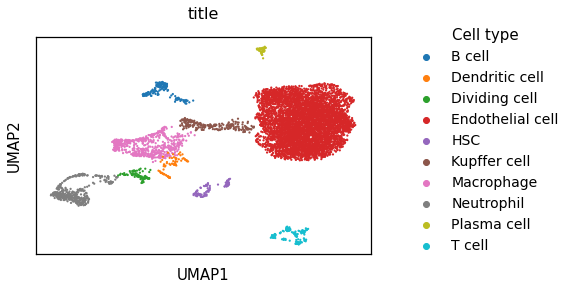

In [ ]:
plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df, 
                    hue=umap_df.index,                   
                    s=5,
                    linewidth=0,
                    palette = sns.color_palette("tab10"))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title("title", pad = 18, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)

## 2.1 Plotting separately tdTom+ and tdTom- with Cd59a expression

Splitting the full dataframe based on tdTomato expression.
* tdTomato+ cells: cells that have tdTomato expression > 1.5
* tdTomato- cells: cells that have tdTomato expression <= 1.5

In [ ]:
# Assigning a binary value to tdTomato expression
umap_df = pd.DataFrame({'umap1': adata.obsm["X_umap"][:,0], 'umap2': adata.obsm["X_umap"][:,1], 
                        "cell_type": list(df_reduced.index),  "Cd59a": df_reduced.Cd59a, "tdTomato": list(df_reduced.tdTomato) },
                      columns=['umap1', 'umap2', "cell_type", "Cd59a", "tdTomato"])
umap_df['tdTomato_categ'] = np.where(umap_df['tdTomato']<=1.5 , 0 , umap_df['tdTomato'])
umap_df['tdTomato_categ'] = np.where(umap_df['tdTomato']>1.5 , 1 , umap_df['tdTomato_categ'])

In [ ]:
umap_df

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Endothelial cell,5.499436,2.796032,Endothelial cell,1.118113,2.177531,1.0
Endothelial cell,1.870096,0.595525,Endothelial cell,0.726054,2.662798,1.0
Endothelial cell,2.424607,1.407490,Endothelial cell,0.881234,1.342278,0.0
Endothelial cell,1.813806,1.579184,Endothelial cell,0.000000,2.871233,1.0
Endothelial cell,1.550893,1.760944,Endothelial cell,1.570269,2.616895,1.0
...,...,...,...,...,...,...
T cell,4.856079,-11.421179,T cell,1.120322,1.899277,1.0
Neutrophil,-14.363137,-6.498253,Neutrophil,0.000000,2.162617,1.0
B cell,-5.938601,7.957779,B cell,0.000000,0.000000,0.0


In [ ]:
# Removing Endothelial and Plasma cells for clarity
umap_df_filtered = umap_df[umap_df.cell_type != "Endothelial cell"]
umap_df_filtered = umap_df_filtered[umap_df_filtered.cell_type != "Plasma cell"]
umap_df_filtered.cell_type.unique()

array(['Dendritic cell', 'Kupffer cell', 'Macrophage', 'HSC',
       'Neutrophil', 'Dividing cell', 'B cell', 'T cell'], dtype=object)

In [ ]:
# Split the DataFrame based on a tdTomato expression
condition = umap_df['tdTomato_categ'] == 1
umap_df_td_up = umap_df[condition]
umap_df_td_down = umap_df[~condition]

In [ ]:
umap_df_td_up

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Endothelial cell,5.499436,2.796032,Endothelial cell,1.118113,2.177531,1.0
Endothelial cell,1.870096,0.595525,Endothelial cell,0.726054,2.662798,1.0
Endothelial cell,1.813806,1.579184,Endothelial cell,0.000000,2.871233,1.0
Endothelial cell,1.550893,1.760944,Endothelial cell,1.570269,2.616895,1.0
Endothelial cell,2.093386,1.654098,Endothelial cell,1.221857,3.307924,1.0
...,...,...,...,...,...,...
T cell,4.266546,-12.601784,T cell,0.000000,1.760288,1.0
Neutrophil,-12.126589,-6.696412,Neutrophil,0.000000,2.040685,1.0
T cell,4.856079,-11.421179,T cell,1.120322,1.899277,1.0


In [ ]:
# Removing Endothelial and Plasma cells for clarity
umap_df_td_up_filtered = umap_df_td_up[umap_df_td_up.cell_type != "Endothelial cell"]
umap_df_td_up_filtered = umap_df_td_up_filtered[umap_df_td_up_filtered.cell_type != "Plasma cell"]

umap_df_td_down_filtered = umap_df_td_down[umap_df_td_down.cell_type != "Endothelial cell"]
umap_df_td_down_filtered = umap_df_td_down_filtered[umap_df_td_down_filtered.cell_type != "Plasma cell"]

In [ ]:
umap_df_td_up_filtered

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Dendritic cell,-4.771932,-0.955447,Dendritic cell,1.055999,2.339325,1.0
Kupffer cell,-3.987746,2.695796,Kupffer cell,0.288660,1.795016,1.0
Kupffer cell,-1.998549,2.729539,Kupffer cell,1.037788,2.716546,1.0
Kupffer cell,-0.898172,2.394336,Kupffer cell,1.375745,2.184710,1.0
Kupffer cell,-4.159777,3.386216,Kupffer cell,0.687587,2.628707,1.0
...,...,...,...,...,...,...
T cell,4.266546,-12.601784,T cell,0.000000,1.760288,1.0
Neutrophil,-12.126589,-6.696412,Neutrophil,0.000000,2.040685,1.0
T cell,4.856079,-11.421179,T cell,1.120322,1.899277,1.0


In [ ]:
def plot_UMAP(df, figname, title):
    """
    Function that inputs a dataframe and plots the UMAP with different cell types.
    Figname and title are the name and title of the figure to export.
    """
    plt.figure(figsize = (5,5))
    with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=df, 
                    hue=df.index,                   
                    s=10,
                    linewidth=0,
                    palette = sns.color_palette("tab10"))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title(str(title), pad = 14, fontsize = 16)
        #ax.get_legend().remove()
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.), frameon = False, title = "Cell type:", fontsize = 14)
    plt.savefig("figures/"+figname, bbox_inches='tight')       

In [ ]:
def plot_UMAP_tdTomato_expression(df, figname, title):
    """
    Function that inputs a dataframe and plots the UMAP with different cell types.
    Figname is the name of the figure to export.
    """
    plt.figure(figsize = (5,5))
    with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=df, 
                    hue=df.Cd59a,                   
                    s=10,
                    linewidth=0,
                    #palette = sns.color_palette("tab10"))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
                    palette = sns.cubehelix_palette(hue=0.8, gamma = 1.2, as_cmap=True))
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title(title, pad = 10, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        norm=plt.Normalize(umap_df_td_down.Cd59a.min(),umap_df_td_down.Cd59a.max())
        sm=plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(hue=0.8, gamma = 1.3, as_cmap=True),norm=norm)
        sm.set_array([])
        ax.get_legend().remove()
        ax.figure.colorbar(sm) #comment in case plot without colorbar is needed
    plt.savefig("figures/"+figname)   

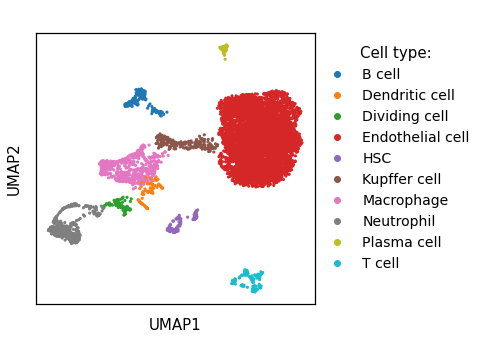

In [ ]:
plot_UMAP(umap_df, "umap_allcells.svg", " ")

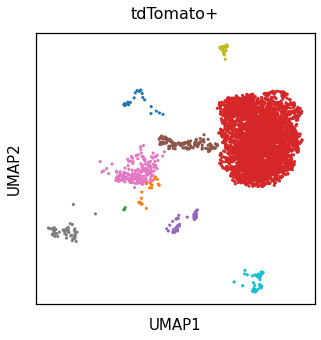

In [ ]:
plot_UMAP(umap_df_td_up, "umap_allcells_tdTom_up.svg", "tdTomato+")

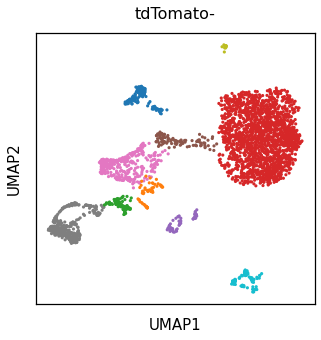

In [ ]:
plot_UMAP(umap_df_td_down, "umap_allcells_tdTom_down.svg", "tdTomato-")

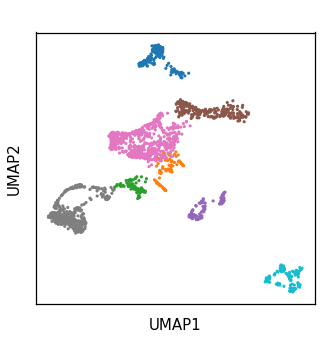

In [ ]:
plot_UMAP(umap_df_filtered, "umap_filteredcells.svg", " ") #manually remove endothelial and plasma from legend

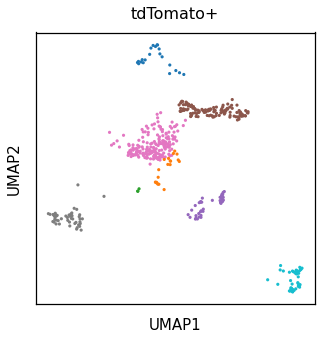

In [ ]:
plot_UMAP(umap_df_td_up_filtered, "umap_filteredcells_tdTom_up.svg", "tdTomato+") #manually remove endothelial and plasma from legend

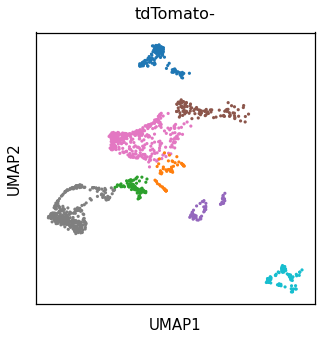

In [ ]:
plot_UMAP(umap_df_td_down_filtered, "umap_filteredcells_tdTom_down.svg", "tdTomato-") #manually remove endothelial and plasma from legend

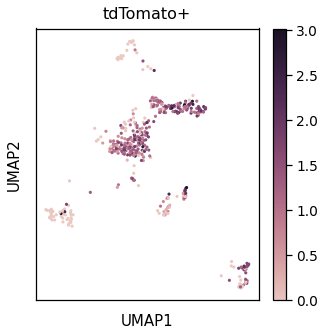

In [ ]:
plot_UMAP_tdTomato_expression(umap_df_td_up_filtered, "umap_filtered_tdTom_up_Cd59a.svg", "tdTomato+")

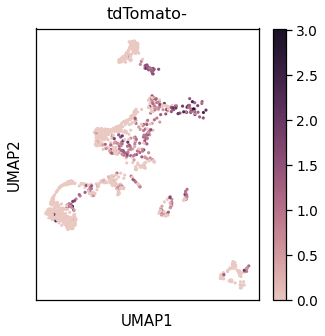

In [ ]:
plot_UMAP_tdTomato_expression(umap_df_td_down_filtered, "umap_filtered_tdTom_down_Cd59a.svg", "tdTomato-")

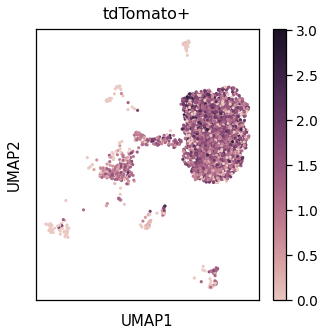

In [ ]:
plot_UMAP_tdTomato_expression(umap_df_td_up, "umap_tdTom_up_Cd59a.svg", "tdTomato+")

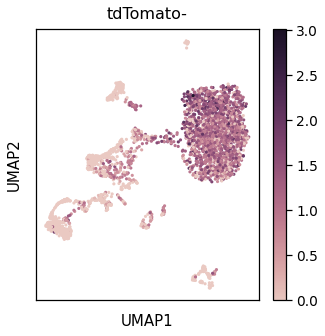

In [ ]:
plot_UMAP_tdTomato_expression(umap_df_td_down, "umap_tdTom_down_Cd59a.svg", "tdTomato-")

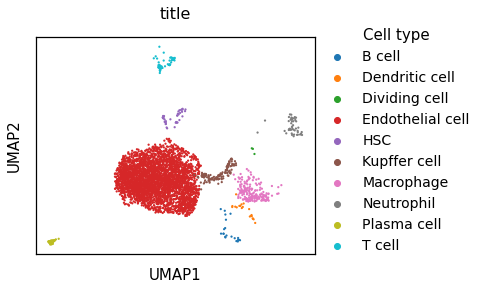

In [ ]:
plt.figure(figsize=(5, 4))
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df_td_up, 
                    hue=umap_df_td_up.index,                   
                    s=5,
                    linewidth=0,
                    palette = sns.color_palette("tab10"))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title("title", pad = 18, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)

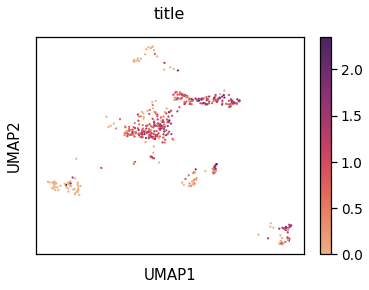

In [ ]:
plt.figure(figsize=(6, 4))
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df_td_up, 
                    hue=umap_df_td_up.Cd59a,                   
                    s=5,
                    linewidth=0,
                    #palette = sns.color_palette("tab10"))
                    palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title("title", pad = 18, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        norm=plt.Normalize(umap_df_td_down.Cd59a.min(),umap_df_td_down.Cd59a.max())
        sm=plt.cm.ScalarMappable(cmap="flare",norm=norm)
        sm.set_array([])
        ax.get_legend().remove()
        ax.figure.colorbar(sm)
plt.savefig("figures/umap_test.svg")
        #sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)

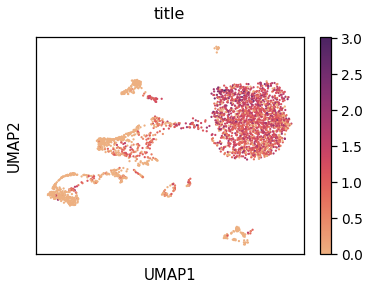

In [ ]:
plt.figure(figsize=(6, 4))
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df_td_down, 
                    hue=umap_df_td_down.Cd59a,                   
                    s=5,
                    linewidth=0,
                    #palette = sns.color_palette("tab10"))
                    palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        
        
        plt.ylabel("UMAP2")
        plt.title("title", pad = 18, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        norm=plt.Normalize(umap_df_td_down.Cd59a.min(),umap_df_td_down.Cd59a.max())
        sm=plt.cm.ScalarMappable(cmap="flare",norm=norm)
        sm.set_array([])
        ax.get_legend().remove()
        ax.figure.colorbar(sm)
        #sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)

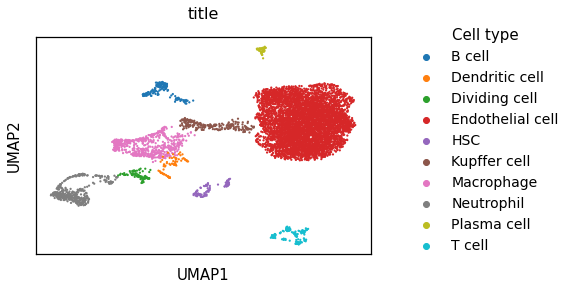

In [ ]:
plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df, 
                    hue=umap_df.index,                   
                    s=5,
                    linewidth=0,
                    palette = sns.color_palette("tab10"))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title("title", pad = 18, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)
        

In [ ]:
#removing endothelial and plasma cells
umap_df_td_up = umap_df_td_up[umap_df_td_up.cell_type != "Endothelial cell"]
umap_df_td_up = umap_df_td_up[umap_df_td_up.cell_type != "Plasma cell"]

umap_df_td_down = umap_df_td_down[umap_df_td_down.cell_type != "Endothelial cell"]
umap_df_td_down = umap_df_td_down[umap_df_td_down.cell_type != "Plasma cell"]

In [ ]:
umap_df_td_up

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Dendritic cell,9.749967,4.115393,Dendritic cell,1.055999,2.339325,1.0
Kupffer cell,9.360532,7.388650,Kupffer cell,0.288660,1.795016,1.0
Kupffer cell,7.900409,6.138807,Kupffer cell,1.037788,2.716546,1.0
Kupffer cell,7.049221,5.909952,Kupffer cell,1.375745,2.184710,1.0
Kupffer cell,9.127704,7.962875,Kupffer cell,0.687587,2.628707,1.0
...,...,...,...,...,...,...
T cell,2.272536,18.991323,T cell,0.000000,1.760288,1.0
Neutrophil,16.000744,10.882645,Neutrophil,0.000000,2.040685,1.0
T cell,1.304921,18.100470,T cell,1.120322,1.899277,1.0


In [ ]:
umap_df_td_down

,umap1,umap2,cell_type,Cd59a,tdTomato,tdTomato_categ
cell type,,,,,,
Kupffer cell,9.532843,8.096884,Kupffer cell,0.000000,0.00000,0.0
Kupffer cell,6.699384,6.096011,Kupffer cell,1.889482,0.00000,0.0
Kupffer cell,8.457203,6.816123,Kupffer cell,0.528098,0.00000,0.0
Kupffer cell,9.364566,6.995083,Kupffer cell,0.570269,0.00000,0.0
Kupffer cell,7.297747,6.168102,Kupffer cell,0.000000,0.00000,0.0
...,...,...,...,...,...,...
T cell,0.952969,18.979364,T cell,0.000000,0.00000,0.0
T cell,0.827937,19.869440,T cell,0.000000,1.28872,0.0
B cell,8.709203,-0.519264,B cell,0.000000,0.00000,0.0


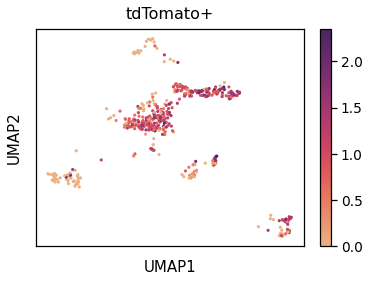

In [ ]:
plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df_td_up, 
                    hue=umap_df_td_up.Cd59a,                   
                    s=10,
                    linewidth=0,
                    #palette = sns.color_palette("tab10"))
                    palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title("tdTomato+", pad = 10, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        norm=plt.Normalize(umap_df_td_down.Cd59a.min(),umap_df_td_down.Cd59a.max())
        sm=plt.cm.ScalarMappable(cmap="flare",norm=norm)
        sm.set_array([])
        ax.get_legend().remove()
        ax.figure.colorbar(sm)

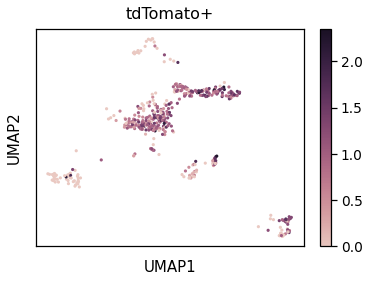

In [ ]:
plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df_td_up, 
                    hue=umap_df_td_up.Cd59a,                   
                    s=10,
                    linewidth=0,
                    #palette = sns.color_palette("tab10"))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
                    palette = sns.cubehelix_palette(hue=0.8, gamma = 1.2, as_cmap=True))
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.title("tdTomato+", pad = 10, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        norm=plt.Normalize(umap_df_td_down.Cd59a.min(),umap_df_td_down.Cd59a.max())
        sm=plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(hue=0.8, gamma = 1.3, as_cmap=True),norm=norm)
        sm.set_array([])
        ax.get_legend().remove()
        ax.figure.colorbar(sm)
        #sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)

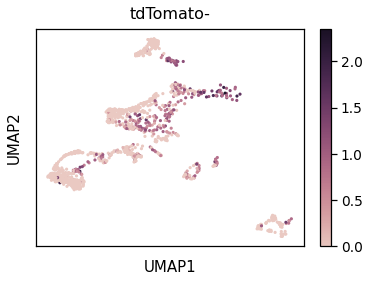

In [ ]:
plt.figure()
with sns.plotting_context("notebook", font_scale=1.25): #style cound be changed to "talk" or "notebook"
        ax = sns.scatterplot(x="umap1", y="umap2",
                    data=umap_df_td_down, 
                    hue=umap_df_td_down.Cd59a,                   
                    s=10,
                    linewidth=0,
                    #palette = sns.color_palette("tab10"))
                    palette = sns.cubehelix_palette(hue=0.8, gamma = 1.2, as_cmap=True))
                    #palette = sns.color_palette("flare", as_cmap=True)) #from colorblind palette in order: blue, green, orange
        ax.tick_params(bottom=False, left = False)
        ax.set(xticklabels=[], yticklabels=[])
        plt.xlabel("UMAP1")
        
        
        plt.ylabel("UMAP2")
        plt.title("tdTomato-", pad = 10, fontsize = 16)
        #plt.legend(frameon=False)  #--> to remove legend box
        #plt.legend(fontsize = 37) # --> to remove legend title
        #plt.setp(ax.get_legend().get_texts(), fontsize='42') # for legend text
        #plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        norm=plt.Normalize(umap_df_td_down.Cd59a.min(),umap_df_td_down.Cd59a.max())
        sm=plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(hue=0.8, gamma = 1.3, as_cmap=True),norm=norm)
        sm.set_array([])
        ax.get_legend().remove()
        cb = ax.figure.colorbar(sm)
        #cb.ax.tick_params(size=0)
        #cb.ax.set_yticklabels(['0', '0.5', '1','1.5', '2'])
        #cb.outline.set_visible(False)

        #sns.move_legend(ax, "upper right", bbox_to_anchor=(1.6, 1.1), frameon = False, title = "Cell type", fontsize = 14)